# Analyse des Correspondances Multiples (ACM)

## Données - 

In [1]:
# Chargement des données
import pandas as pd

donnee = pd.read_excel('races_canines_acm.xls',sheet_name=0,header=0,index_col=0)

In [2]:
# Dimension du tableau
I = donnee.shape[0]  # nombre de lignes
J = donnee.shape[1]  # nombre de colonnes
print(f'Total individus : {I}. Total variables : {J}.')

Total individus : 27. Total variables : 6.


In [3]:
# Statistiques descriptives
stats = donnee.describe(include=[object])
stats.index.name = 'Statistiques'
display(stats)

,Taille,Poids,Velocite,Intelligence,Affection,Agressivite
Statistiques,,,,,,
count,27,27,27,27,27,27
unique,3,3,3,3,2,2
top,Taille++,Poids+,Veloc-,Intell+,Affec+,Agress-
freq,15,14,10,13,14,14


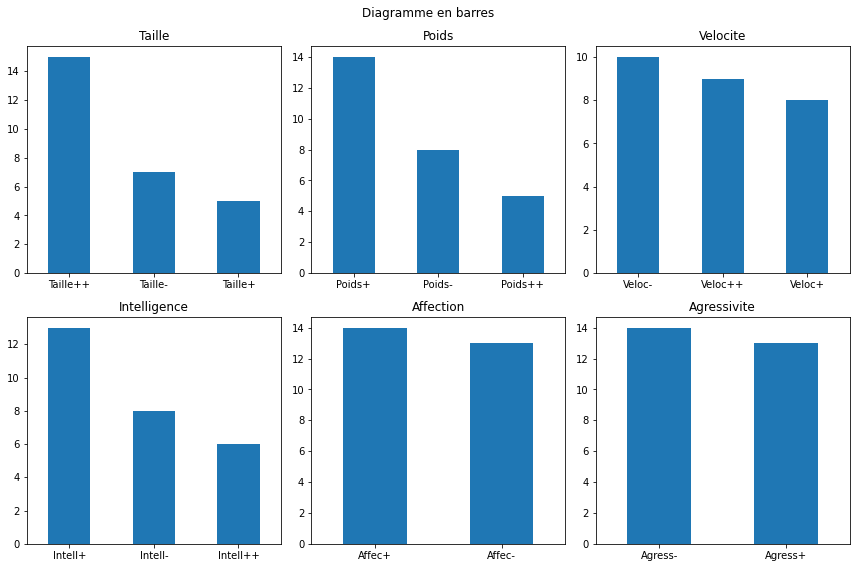

In [4]:
# Diagrammes en barres
import matplotlib.pyplot as plt

for i,name in enumerate(donnee.columns):
    plt.subplot(2, 3, i+1)
    donnee[name].value_counts().plot.bar(figsize=(12,8))
    plt.title(name)
    plt.xticks(rotation= 0)
    plt.tight_layout()
    plt.suptitle("Diagramme en barres", fontsize=12)
plt.show()

In [5]:
# khi-deux de contingence et pvalue
import scipy.stats as stat
import numpy as np
chi2 = pd.DataFrame(np.zeros(shape=(J,J),dtype=float),index=donnee.columns,
                    columns = donnee.columns)
pvalue = pd.DataFrame(np.zeros(shape=(J,J),dtype=float),index=donnee.columns,
                    columns = donnee.columns)
for i in range(J):
    for j in range(i+1,J):
        tab = pd.crosstab(donnee.iloc[:,i],donnee.iloc[:,j])
        chi = stat.chi2_contingency(tab)
        chi2.iloc[i,j] = chi[0];pvalue.iloc[i,j]=chi[1]

In [6]:
# Affichage
print(chi2.round(3),pvalue.round(3))

              Taille   Poids  Velocite  Intelligence  Affection  Agressivite
Taille           0.0  25.329    15.891         3.608     13.954        2.051
Poids            0.0   0.000    18.470         1.356      9.476        2.552
Velocite         0.0   0.000     0.000         3.156      2.967        0.575
Intelligence     0.0   0.000     0.000         0.000      3.891        1.157
Affection        0.0   0.000     0.000         0.000      0.000        0.915
Agressivite      0.0   0.000     0.000         0.000      0.000        0.000               Taille  Poids  Velocite  Intelligence  Affection  Agressivite
Taille           0.0    0.0     0.003         0.462      0.001        0.359
Poids            0.0    0.0     0.001         0.852      0.009        0.279
Velocite         0.0    0.0     0.000         0.532      0.227        0.750
Intelligence     0.0    0.0     0.000         0.000      0.143        0.561
Affection        0.0    0.0     0.000         0.000      0.000        0.339
Agres

### Tableau disjonctif complet

In [130]:
# Tableau disjonctif complet
dummies = pd.get_dummies(donnee, prefix="",prefix_sep="")
display(dummies)

,Taille+,Taille++,Taille-,Poids+,Poids++,Poids-,Veloc+,Veloc++,Veloc-,Intell+,Intell++,Intell-,Affec+,Affec-,Agress+,Agress-
Chien,,,,,,,,,,,,,,,,
Beauceron,0,1,0,1,0,0,0,1,0,1,0,0,1,0,1,0
Basset,0,0,1,0,0,1,0,0,1,0,0,1,0,1,1,0
Berger All,0,1,0,1,0,0,0,1,0,0,1,0,1,0,1,0
Boxer,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0
Bull-Dog,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0,1
Bull-Mastif,0,1,0,0,1,0,0,0,1,0,1,0,0,1,1,0
Caniche,0,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1
Chihuahua,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,1
Cocker,1,0,0,0,0,1,0,0,1,1,0,0,1,0,1,0


In [8]:
# total de modalités
K = dummies.shape[1]
print(f'Le nombre total de modalités est {K}.')

Le nombre total de modalités est 16.


In [9]:
# Total d'axes factoriels
hmax = K-J
print(f'Le nombre d\'axe maximal est {hmax}.')

Le nombre d'axe maximal est 10.


#### Marge colonne

In [129]:
# Marge colonne
colMarge= dummies.sum(axis=1)
display(colMarge)

Chien
Beauceron         6
Basset            6
Berger All        6
Boxer             6
Bull-Dog          6
Bull-Mastif       6
Caniche           6
Chihuahua         6
Cocker            6
Colley            6
Dalmatien         6
Doberman          6
Dogue All         6
Epag. Breton      6
Epag. Français    6
Fox-Hound         6
Fox-Terrier       6
Gd Bleu Gasc      6
Labrador          6
Levrier           6
Mastiff           6
Pekinois          6
Pointer           6
St-Bernard        6
Setter            6
Teckel            6
Terre-Neuve       6
dtype: int64

#### Marge ligne

In [128]:
# Marge ligne
rowMarge = dummies.sum(axis=0)
display(rowMarge)

Taille+      5
Taille++    15
Taille-      7
Poids+      14
Poids++      5
Poids-       8
Veloc+       8
Veloc++      9
Veloc-      10
Intell+     13
Intell++     6
Intell-      8
Affec+      14
Affec-      13
Agress+     13
Agress-     14
dtype: int64

In [127]:
# Vérification
somme = []
for name in donnee.columns:
    modalite = rowMarge.loc[list(np.unique(donnee[[name]]))].sum()
    somme.append(modalite)
display(somme)

[27, 27, 27, 27, 27, 27]

### Analyse des proximités entre les individus

In [126]:
# Profil modalité moyen
indMoyen = rowMarge/(I*J)
display(indMoyen.round(3))

Taille+     0.031
Taille++    0.093
Taille-     0.043
Poids+      0.086
Poids++     0.031
Poids-      0.049
Veloc+      0.049
Veloc++     0.056
Veloc-      0.062
Intell+     0.080
Intell++    0.037
Intell-     0.049
Affec+      0.086
Affec-      0.080
Agress+     0.080
Agress-     0.086
dtype: float64

#### Distance entre les individus

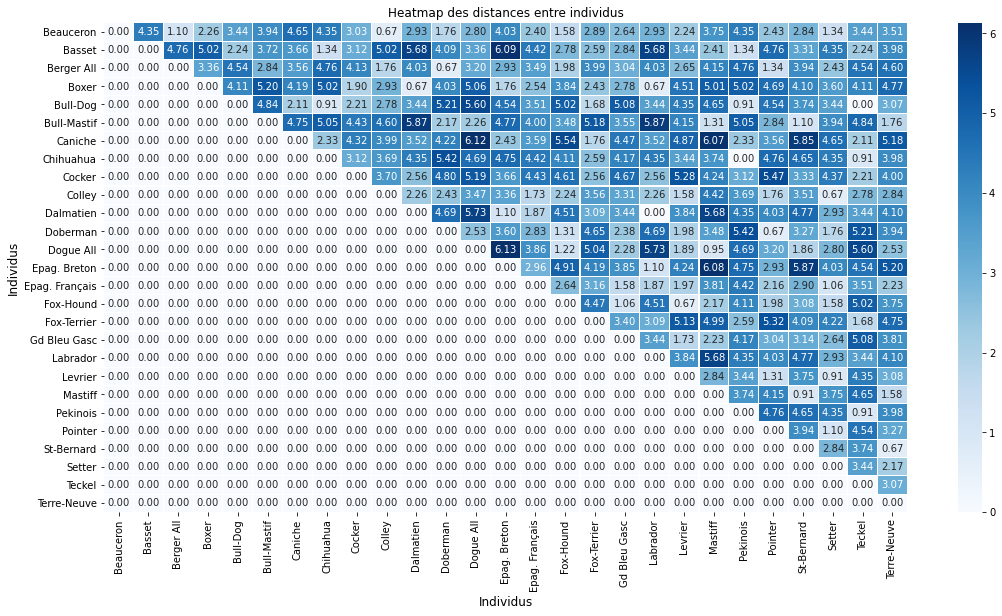

In [14]:
# Distance entre les individus
import numpy as np

rowdist = pd.DataFrame(np.zeros(shape=(I,I),dtype=float), 
                       index = donnee.index,
                       columns = donnee.index)
for i in range(I):
    for j in range(i+1,I):
        rowdist.iloc[i,j] = np.sum(1/indMoyen*(dummies.values[i,:]/J-dummies.values[j,:]/J)**2)
# Graphique
import seaborn as sns
plt.figure(figsize = (18,9))
plt.title('Heatmap des distances entre individus', fontsize=12)
sns.heatmap(rowdist.values,linewidth = 0.1, cmap = "Blues",
            annot=True, fmt = '.2f',xticklabels = donnee.index,
            yticklabels = donnee.index)
plt.xlabel('Individus', fontsize=12)
plt.ylabel('Individus', fontsize=12)
plt.show()

#### Distance à l'origine

In [125]:
# Distance à l'origine des observations
rowdisto = dummies.apply(lambda x : np.sum(1/indMoyen*(x/J - indMoyen)**2),
                         axis = 1)
display(rowdisto.round(3))

Chien
Beauceron         1.135
Basset            1.910
Berger All        1.539
Boxer             1.798
Bull-Dog          1.644
Bull-Mastif       2.092
Caniche           2.161
Chihuahua         1.861
Cocker            1.926
Colley            1.110
Dalmatien         1.773
Doberman          1.564
Dogue All         1.955
Epag. Breton      2.177
Epag. Français    1.198
Fox-Hound         1.376
Fox-Terrier       1.782
Gd Bleu Gasc      1.439
Labrador          1.773
Levrier           1.352
Mastiff           1.905
Pekinois          1.861
Pointer           1.539
St-Bernard        1.688
Setter            1.135
Teckel            1.644
Terre-Neuve       1.664
dtype: float64

#### Inertie totale

In [124]:
# Poids des observations
rowweight = np.ones(I)/I 
# Inertie des lignes
rowinertie = rowdisto.values*rowweight
# Affichage
rowinfos = pd.DataFrame(np.transpose([rowdisto, rowweight, rowinertie]),
                       columns = ["Disto2", "Poids", "Inertie"],
                       index = donnee.index)
display(rowinfos.round(3))

,Disto2,Poids,Inertie
Chien,,,
Beauceron,1.135,0.037,0.042
Basset,1.910,0.037,0.071
Berger All,1.539,0.037,0.057
Boxer,1.798,0.037,0.067
Bull-Dog,1.644,0.037,0.061
Bull-Mastif,2.092,0.037,0.077
Caniche,2.161,0.037,0.080
Chihuahua,1.861,0.037,0.069
Cocker,1.926,0.037,0.071


__Remarque :__

In [17]:
# Inertie totale
inertietot = np.sum(rowinertie)
print("Inertie totale égale à %.3f."%(inertietot))

Inertie totale égale à 1.667.


__Analyse du point de vue des modalités__

__Distance entre les modalités__

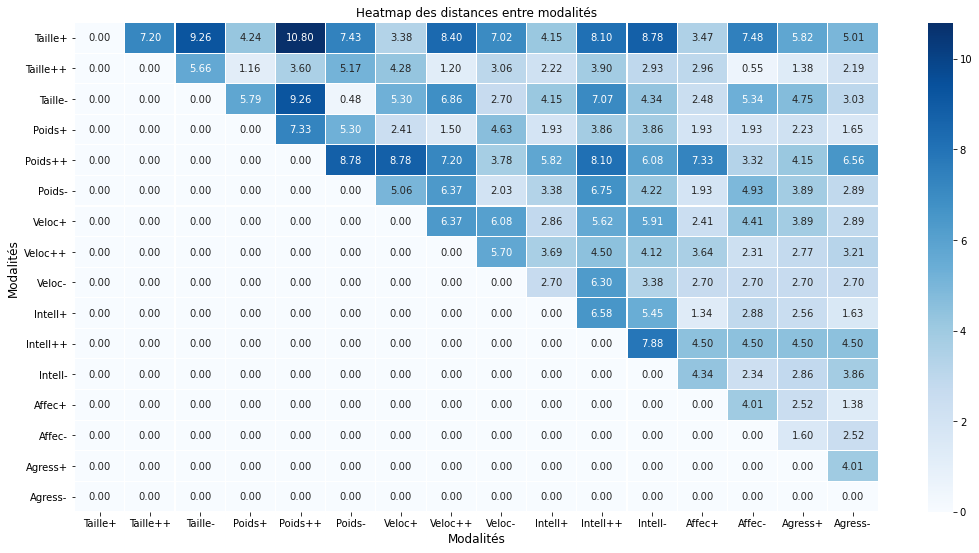

In [18]:
# Distance entre les modalités
moddist = pd.DataFrame(np.zeros((K, K),dtype=float),index = dummies.columns,
                       columns = dummies.columns)
for i in range(K):
    for j in range(i+1,K):
        moddist.iloc[i,j] = np.sum(I*(dummies.values[:,i]/rowMarge[i]-dummies.values[:,j]/rowMarge[j])**2)

# Heatmap
plt.figure(figsize = (18,9))
sns.heatmap(moddist,linewidth = 0.1, cmap = "Blues",
            annot=True, fmt = '.2f',xticklabels = dummies.columns,
            yticklabels = dummies.columns)
plt.title('Heatmap des distances entre modalités',fontsize=12)
plt.xlabel('Modalités', fontsize=12)
plt.ylabel('Modalités', fontsize=12)
plt.show()

__Distance à l'origine__

In [123]:
# moyenne
modmean = np.ones(I)/I 
# Distance à l'origine
dummiesweight = dummies/rowMarge
moddisto = dummiesweight.apply(lambda x : np.sum(I*(x-modmean)**2),axis = 0)
display(moddisto.round(3))

Taille+     4.400
Taille++    0.800
Taille-     2.857
Poids+      0.929
Poids++     4.400
Poids-      2.375
Veloc+      2.375
Veloc++     2.000
Veloc-      1.700
Intell+     1.077
Intell++    3.500
Intell-     2.375
Affec+      0.929
Affec-      1.077
Agress+     1.077
Agress-     0.929
dtype: float64

__Inertie totale__

In [122]:
#Poids des modalités
modweight = indMoyen
# Inertie des lignes
modinertie = moddisto.values*modweight
# Affichage
modinfos = pd.DataFrame(np.transpose([moddisto, modweight, modinertie]),
                       columns = ["Disto2", "Poids", "Inertie"],
                       index = dummies.columns)
display(modinfos.round(3))

,Disto2,Poids,Inertie
Taille+,4.400,0.031,0.136
Taille++,0.800,0.093,0.074
Taille-,2.857,0.043,0.123
Poids+,0.929,0.086,0.080
Poids++,4.400,0.031,0.136
Poids-,2.375,0.049,0.117
Veloc+,2.375,0.049,0.117
Veloc++,2.000,0.056,0.111
Veloc-,1.700,0.062,0.105
Intell+,1.077,0.080,0.086


In [21]:
# Inertie totale
inertietot = np.sum(modinertie)
print('Inertie totale : %.3f.' %(inertietot))

Inertie totale : 1.667.


In [121]:
# Inertie des variables
varinertie = pd.DataFrame(np.zeros(shape=(1,J),dtype=float),index = ['inertie'],
                          columns= donnee.columns,)
for name in donnee.columns:
    varinertie.loc[:,name]= modinfos.loc[np.unique(donnee[name]),'Inertie'].sum()
# Affichage
display(varinertie.round(3))

Variable,Taille,Poids,Velocite,Intelligence,Affection,Agressivite
inertie,0.333,0.333,0.333,0.333,0.167,0.167


In [120]:
# Inertie des variables - Approche 2
varinertie2 = pd.DataFrame(np.zeros(shape=(1,J),dtype=float),index = ['inertie'],
                          columns= donnee.columns,)
for name in donnee.columns:
    varinertie2.loc[:,name]= (len(np.unique(donnee[name]))-1)/J
# Affichage
display(varinertie2.round(3))

Variable,Taille,Poids,Velocite,Intelligence,Affection,Agressivite
inertie,0.333,0.333,0.333,0.333,0.167,0.167


In [24]:
print('Inertie totale : %.3f.'%(np.sum(varinertie.values)))

Inertie totale : 1.667.


### Mise en oeuvre de l'ACM

In [25]:
# Chargement du package
from mca import MCA
mcaModel = MCA(dummies,ncols=K,benzecri=False)

In [119]:
# eigenvalue dataframe
eigenvalue = mcaModel.L
percent = np.array([100*x/sum(eigenvalue) for x in eigenvalue])
cumpercent = np.cumsum(percent)
columns = ['valeur propre','pourcentage d\'inertie',
           'pourcentage d\'inertie cumulée']
index = ['Dim.{}'.format(x+1) for x in range(len(eigenvalue))]
Eigen = pd.DataFrame(np.transpose([eigenvalue,percent,cumpercent]),
                     index=index,columns = columns)
Eigen.index.name = 'Dimension'
# Affichage
display(Eigen.round(3))

,valeur propre,pourcentage d'inertie,pourcentage d'inertie cumulée
Dimension,,,
Dim.1,0.482,28.896,28.896
Dim.2,0.385,23.084,51.981
Dim.3,0.211,12.657,64.638
Dim.4,0.158,9.453,74.091
Dim.5,0.150,9.008,83.099
Dim.6,0.123,7.398,90.497
Dim.7,0.081,4.888,95.385
Dim.8,0.046,2.740,98.125
Dim.9,0.024,1.413,99.537


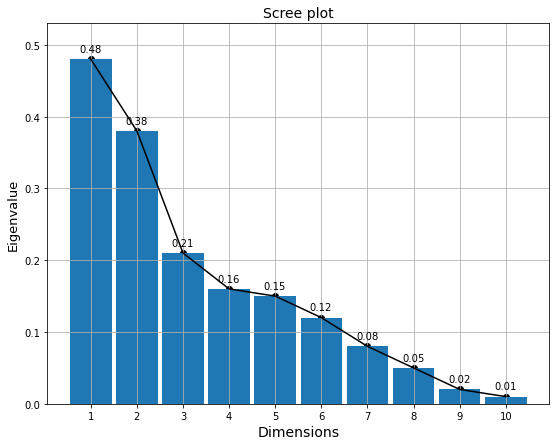

In [27]:
# Visualisation des valeurs propres
def screeplot(data,choice=None,figsize=None):
    #
    p = data.shape[0]
    fig,axes = plt.subplots(figsize = figsize); axes.grid()
    axes.set_xlabel('Dimensions',fontsize=14)
    axes.set_title('Scree plot',fontsize=14)
    axes.set_xticks([x for x in range(1,p+1)])
    if choice is None or choice=='scree plot':
        eigen = data.iloc[:,0].round(2)
        ylim = np.max(eigen)+0.05
        axes.set_ylim(0,ylim)
        axes.bar(np.arange(1,p+1),eigen.values,width=0.9)
        axes.plot(np.arange(1,p+1),eigen.values,c="black")
        axes.set_ylabel('Eigenvalue',fontsize=13)
        ## Add text
        for i in range(p):
            axes.scatter(i+1,eigen.values[i],color='black',alpha=1)
            axes.text(i+.75,0.01+eigen.values[i],str(eigen.values[i]),
                     color = 'black')
    elif choice == "percentage":
        percent = data.iloc[:,1].round()
        axes.set_ylim(0,100)
        axes.bar(np.arange(1,p+1),percent.values,width=0.9)
        axes.plot(np.arange(1,p+1),percent.values,c="black")
        axes.set_ylabel('Percentage of variance',fontsize=13)
        ## Add text
        for i in range(p):
            axes.scatter(i+1,percent.values[i],color='black',alpha=1)
            axes.text(i+.6,0.01+percent.values[i],f'{percent.values[i]}%',
                     color = 'black',fontweight='bold',fontsize=12)
    elif choice == "cumulative":
        cumul = data.iloc[:,2].round()
        axes.set_ylim(0,105)
        axes.bar(np.arange(1,p+1),cumul.values,width=0.9)
        axes.set_ylabel('Cumulative percentage of variance',fontsize=13)
    plt.show()
# Affichage
screeplot(data=Eigen,figsize=(9,7))

In [28]:
# inertie totale
inertia = mcaModel.inertia
print('Inertie totale est %.3f.'%(inertia))

Inertie totale est 1.667.


## ACM sous plusieurs formes

### ACM via une AFC sur le tableau disjonctif complet

In [118]:
# ACM via une AFC sur le TDC
from fanalysis.ca import CA

mcaModelCA1 = CA(row_labels=dummies.index.values,col_labels=dummies.columns.values)
mcaModelCA1.fit(dummies.values)
# Valeurs propres
EigenCA1 = pd.DataFrame(mcaModelCA1.eig_.T[:,0],columns = ['lambda'])
EigenCA1.index +=1
display(EigenCA1.T.round(3))

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
lambda,0.482,0.385,0.211,0.158,0.15,0.123,0.081,0.046,0.024,0.008,0.0,0.0,0.0,0.0,0.0


### ACM via une AFC sur le tableau de Burt

In [117]:
# Tableau de Burt
burt = dummies.T.dot(dummies)
display(burt)

,Taille+,Taille++,Taille-,Poids+,Poids++,Poids-,Veloc+,Veloc++,Veloc-,Intell+,Intell++,Intell-,Affec+,Affec-,Agress+,Agress-
Taille+,5,0,0,4,0,1,4,0,1,4,1,0,5,0,2,3
Taille++,0,15,0,10,5,0,2,9,4,6,4,5,3,12,9,6
Taille-,0,0,7,0,0,7,2,0,5,3,1,3,6,1,2,5
Poids+,4,10,0,14,0,0,6,8,0,7,4,3,7,7,6,8
Poids++,0,5,0,0,5,0,0,1,4,2,1,2,0,5,4,1
Poids-,1,0,7,0,0,8,2,0,6,4,1,3,7,1,3,5
Veloc+,4,2,2,6,0,2,8,0,0,5,2,1,6,2,3,5
Veloc++,0,9,0,8,1,0,0,9,0,3,3,3,3,6,5,4
Veloc-,1,4,5,0,4,6,0,0,10,5,1,4,5,5,5,5
Intell+,4,6,3,7,2,4,5,3,5,13,0,0,9,4,5,8


In [116]:
# ACM via une AFC sur le tableau de Burt
mcaModelCA2 = CA(row_labels=burt.index.values,col_labels=burt.columns.values)
mcaModelCA2.fit(burt.values)
# Valeurs propres
EigenCA2 = pd.DataFrame(np.transpose([mcaModelCA2.eig_.T[:,0],
                                      np.sqrt(mcaModelCA2.eig_.T[:,0])]),
                        columns = ['Delta','Lambda'])
EigenCA2.index +=1
display(EigenCA2.T.round(3))

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
Delta,0.232,0.148,0.045,0.025,0.023,0.015,0.007,0.002,0.001,0.000,0.0,0.0,0.0,0.0,0.0
Lambda,0.482,0.385,0.211,0.158,0.150,0.123,0.081,0.046,0.024,0.008,0.0,0.0,0.0,0.0,0.0


### ACM via une ACP sur le tableau des profils

In [115]:
# Tableau de des profils lignes
rowprofil = dummies.apply(lambda x:x/np.sum(x), axis = 1)
#Affichage
display(rowprofil.round(2))

,Taille+,Taille++,Taille-,Poids+,Poids++,Poids-,Veloc+,Veloc++,Veloc-,Intell+,Intell++,Intell-,Affec+,Affec-,Agress+,Agress-
Chien,,,,,,,,,,,,,,,,
Beauceron,0.00,0.17,0.00,0.17,0.00,0.00,0.00,0.17,0.00,0.17,0.00,0.00,0.17,0.00,0.17,0.00
Basset,0.00,0.00,0.17,0.00,0.00,0.17,0.00,0.00,0.17,0.00,0.00,0.17,0.00,0.17,0.17,0.00
Berger All,0.00,0.17,0.00,0.17,0.00,0.00,0.00,0.17,0.00,0.00,0.17,0.00,0.17,0.00,0.17,0.00
Boxer,0.17,0.00,0.00,0.17,0.00,0.00,0.17,0.00,0.00,0.17,0.00,0.00,0.17,0.00,0.17,0.00
Bull-Dog,0.00,0.00,0.17,0.00,0.00,0.17,0.00,0.00,0.17,0.17,0.00,0.00,0.17,0.00,0.00,0.17
Bull-Mastif,0.00,0.17,0.00,0.00,0.17,0.00,0.00,0.00,0.17,0.00,0.17,0.00,0.00,0.17,0.17,0.00
Caniche,0.00,0.00,0.17,0.00,0.00,0.17,0.17,0.00,0.00,0.00,0.17,0.00,0.17,0.00,0.00,0.17
Chihuahua,0.00,0.00,0.17,0.00,0.00,0.17,0.00,0.00,0.17,0.00,0.00,0.17,0.17,0.00,0.00,0.17
Cocker,0.17,0.00,0.00,0.00,0.00,0.17,0.00,0.00,0.17,0.17,0.00,0.00,0.17,0.00,0.17,0.00


In [114]:
# Réduire les variables par les écarts types
def StandardScaler(x):
    return (x/x.std(ddof=0))
rowprofil_sc = rowprofil.transform(StandardScaler)
display(rowprofil_sc.round(2))

,Taille+,Taille++,Taille-,Poids+,Poids++,Poids-,Veloc+,Veloc++,Veloc-,Intell+,Intell++,Intell-,Affec+,Affec-,Agress+,Agress-
Chien,,,,,,,,,,,,,,,,
Beauceron,0.00,2.01,0.00,2.0,0.00,0.00,0.00,2.12,0.00,2.0,0.00,0.00,2.0,0.0,2.0,0.0
Basset,0.00,0.00,2.28,0.0,0.00,2.19,0.00,0.00,2.07,0.0,0.00,2.19,0.0,2.0,2.0,0.0
Berger All,0.00,2.01,0.00,2.0,0.00,0.00,0.00,2.12,0.00,0.0,2.41,0.00,2.0,0.0,2.0,0.0
Boxer,2.57,0.00,0.00,2.0,0.00,0.00,2.19,0.00,0.00,2.0,0.00,0.00,2.0,0.0,2.0,0.0
Bull-Dog,0.00,0.00,2.28,0.0,0.00,2.19,0.00,0.00,2.07,2.0,0.00,0.00,2.0,0.0,0.0,2.0
Bull-Mastif,0.00,2.01,0.00,0.0,2.57,0.00,0.00,0.00,2.07,0.0,2.41,0.00,0.0,2.0,2.0,0.0
Caniche,0.00,0.00,2.28,0.0,0.00,2.19,2.19,0.00,0.00,0.0,2.41,0.00,2.0,0.0,0.0,2.0
Chihuahua,0.00,0.00,2.28,0.0,0.00,2.19,0.00,0.00,2.07,0.0,0.00,2.19,2.0,0.0,0.0,2.0
Cocker,2.57,0.00,0.00,0.0,0.00,2.19,0.00,0.00,2.07,2.0,0.00,0.00,2.0,0.0,2.0,0.0


In [113]:
# Pondération par les modalités
modpond = (I - rowMarge)/(I*J)
display(modpond.round(3))

Taille+     0.136
Taille++    0.074
Taille-     0.123
Poids+      0.080
Poids++     0.136
Poids-      0.117
Veloc+      0.117
Veloc++     0.111
Veloc-      0.105
Intell+     0.086
Intell++    0.130
Intell-     0.117
Affec+      0.080
Affec-      0.086
Agress+     0.086
Agress-     0.080
dtype: float64

In [35]:
# Applique la pondération au profil
rowprofil_pond = rowprofil_sc*np.sqrt(modpond.values)

In [112]:
# ACM via une ACP sur le tableau des profils
from fanalysis.pca import PCA 
mcaModelPCA = PCA(std_unit=False,row_labels=dummies.index,
                  col_labels=dummies.columns) #n_components = hmax, 
mcaModelPCA.fit(rowprofil_pond.values) 
# Valeurs propres
EigenPCA= pd.DataFrame(mcaModelPCA.eig_.T[:,0],columns = ['lambda'])
EigenPCA.index +=1
display(EigenPCA.T.round(3))

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
lambda,0.482,0.385,0.211,0.158,0.15,0.123,0.081,0.046,0.024,0.008,0.0,0.0,0.0,0.0,0.0,0.0


### Coordonnées des individus

In [111]:
# Coordonnées des individus
rowcoord = pd.DataFrame(mcaModel.fs_r(N=hmax),index=donnee.index,
                       columns = index)
display(rowcoord.iloc[:,[0,1]].round(3))

,Dim.1,Dim.2
Chien,,
Beauceron,-0.317,-0.418
Basset,0.254,1.101
Berger All,-0.486,-0.464
Boxer,0.447,-0.882
Bull-Dog,1.013,0.550
Bull-Mastif,-0.753,0.547
Caniche,0.912,-0.016
Chihuahua,0.841,0.844
Cocker,0.733,0.079


#### Nuage des individus

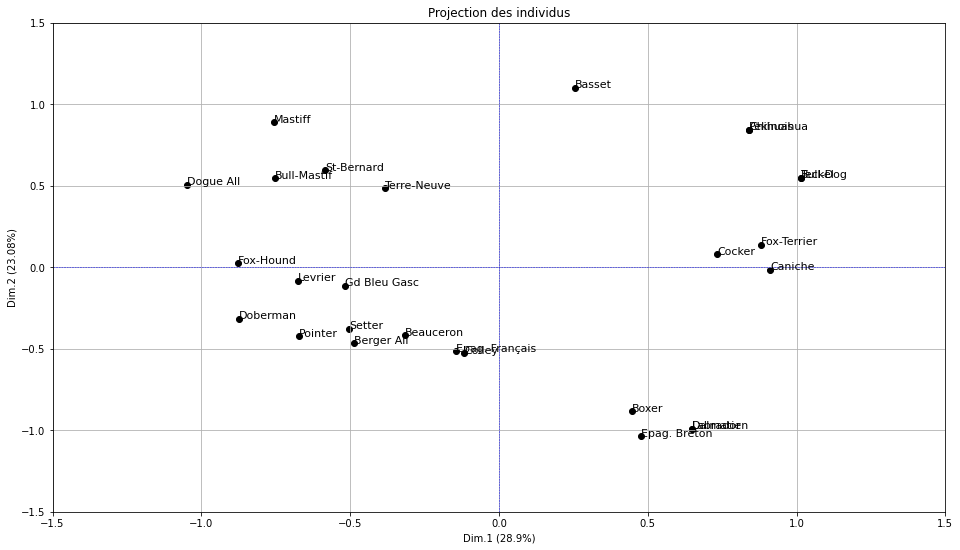

In [38]:
# Fonction de visualisation en 2D
def mca_plot(data,eigen,axei,axej,main,figsize=None):
    try:
        if axei==axej:
            raise ValueError('Erreur: axei doit être différent de axej.')
        elif axei>axej:
            raise ValueError('Erreur: axei doit être inférieur à axej.')
        elif axei<0 or axej<0:
            msg = 'Erreur: les valeurs des axes doivent être positives ou nulles.'
            raise ValueError(msg)
        else:
            # set limite
            n = data.shape[0]
            # Valeurs propres
            percent = np.array([100*x/sum(eigen) for x in eigen])
            dimi = round(percent[axei],2); dimj = round(percent[axej],2)

            # Graphique
            fig, axes = plt.subplots(figsize = figsize); axes.grid()
            axes.axis([-1.5,1.5,-1.5,1.5])
            axes.set_title(main)
            axes.set_xlabel(f"Dim.{1+axei} ({dimi}%)")
            axes.set_ylabel(f"Dim.{1+axej} ({dimj}%)")
            for i in range(n):
                plt.scatter(data.iloc[i,axei], data.iloc[i,axej],
                            c = "black", alpha = 1)
                axes.text(data.iloc[i,axei],data.iloc[i,axej],data.index[i],
                          color = "black", fontsize = 11)
            plt.axhline(0, color='blue',linestyle="--", linewidth=0.5)
            plt.axvline(0, color='blue',linestyle="--", linewidth=0.5)
            plt.show()
            
    # if false then raise the value error
    except ValueError as e:
            print(e) 

# Nuage des individus sur les axes 1 et 2
mca_plot(data=rowcoord,eigen=eigenvalue,axei=0,axej=1,
         main= 'Projection des individus',figsize=(16,9))

### Coordonnées des modalités

In [110]:
# Coordonnées des modalités
modcoord = pd.DataFrame(mcaModel.fs_c(N=hmax),index=dummies.columns,
                       columns = index)
display(modcoord.iloc[:,[0,1]].round(3))

,Dim.1,Dim.2
Taille+,0.851,-1.232
Taille++,-0.837,-0.021
Taille-,1.185,0.924
Poids+,-0.305,-0.819
Poids++,-1.015,0.974
Poids-,1.169,0.824
Veloc+,0.604,-0.888
Veloc++,-0.892,-0.372
Veloc-,0.320,1.045
Intell+,0.369,-0.286


#### Nuage des modalités

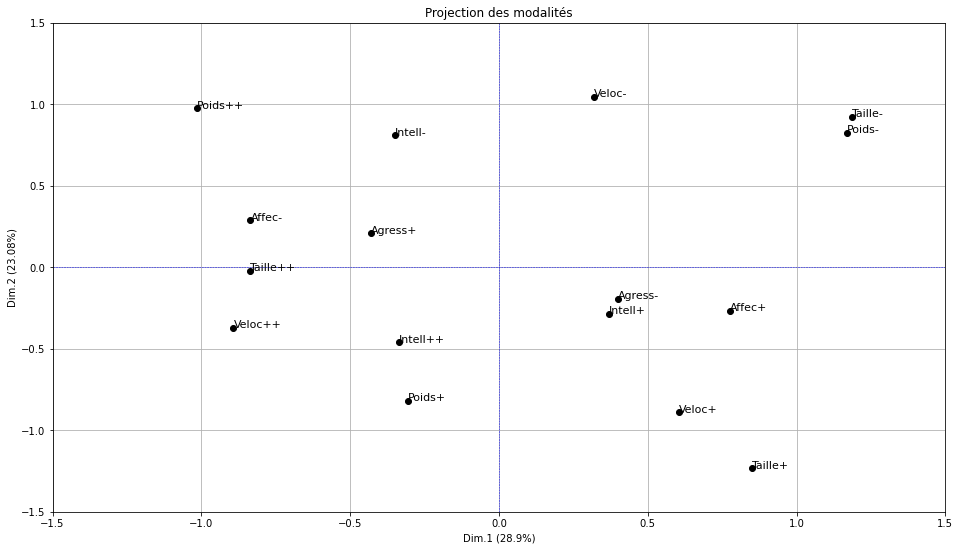

In [40]:
# Nuage des modalités sur les axes 1 et 2
mca_plot(data=modcoord,eigen=eigenvalue,axei=0,axej=1,
         main= 'Projection des modalités',figsize=(16,9))

#### Représentation simulatnée

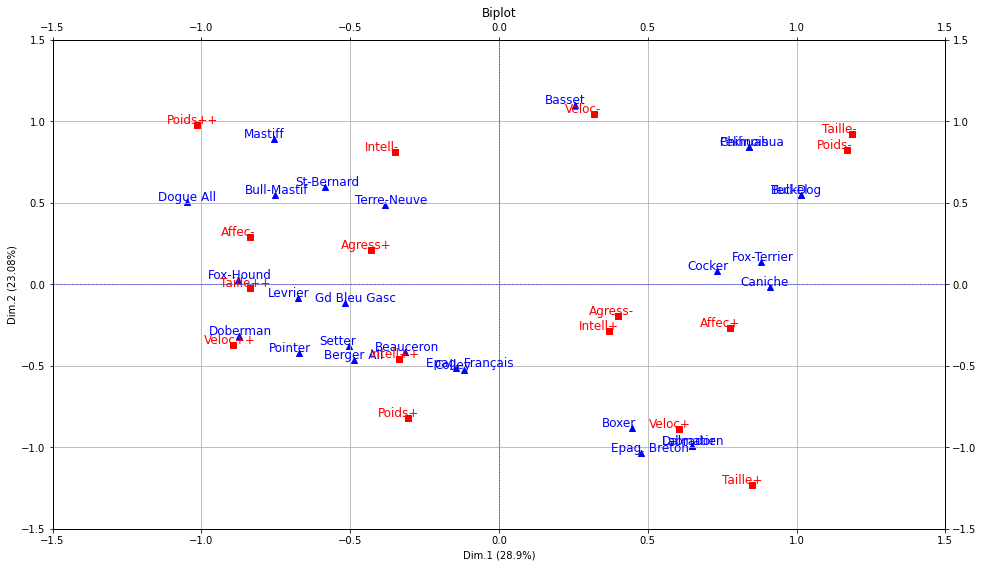

In [41]:
# Nuage simultané
def biplot(data1,data2,eigen,axei,axej,figsize=None):
    # Représentation simultanée des indvidus et des variables
    try:
        if axei==axej:
            raise ValueError('Erreur: axei doit être différent de axej.')
        elif axei>axej:
            raise ValueError('Erreur: axei doit être inférieur à axej.')
        elif axei<0 or axej<0:
            msg = 'Erreur: les valeurs des axes doivent être positives ou nulles.'
            raise ValueError(msg)
        else:
            n = data1.shape[0];p=data2.shape[0]
            # Valeurs propres
            percent = np.array([100*x/sum(eigen) for x in eigen])
            dimi = round(percent[axei],2); dimj = round(percent[axej],2)
            
            # Biplot
            fig = plt.figure(figsize=figsize)
            axes1 = fig.add_subplot(111)
            axes2 = axes1.twiny()
            axes2 = axes2.twinx()
            axes1.grid()
            axes2.axis([-1.5,1.5,-1.5,1.5])
            axes1.axis([-1.5,1.5,-1.5,1.5])
            axes1.set_title("Biplot")
            axes1.set_xlabel(f"Dim.{1+axei} ({dimi}%)")
            axes1.set_ylabel(f"Dim.{1+axej} ({dimj}%)")
            # Affichage des individus
            for i in range(n):
                axes1.scatter(data1.iloc[i,axei],data1.iloc[i,axej],
                              c = "blue",alpha = 1,marker="^")
                axes1.text(data1.iloc[i,axei]-0.10,data1.iloc[i,axej]+0.01,
                           data1.index[i],color = "blue",fontsize=12)
            # Affichage des variables
            for k in range(p):
                axes2.scatter(data2.iloc[k,axei],data2.iloc[k,axej],
                              color='red',alpha=1,marker="s")
                axes2.text(data2.iloc[k,axei]-0.10,data2.iloc[k,axej]+0.01,
                           data2.index[k],color = "red",fontsize=12)
            plt.axhline(0, color='blue',linestyle="--", linewidth=0.5)
            plt.axvline(0, color='blue',linestyle="--", linewidth=0.5)
            plt.show()
            
    except ValueError as e:
            print(e)  

# Affichage
biplot(data1=rowcoord,data2=modcoord,eigen=eigenvalue,axei=0,axej=1,
       figsize=(16,9))

### Relation de transition

In [109]:
# Coordonnées de l'individu i - facteurs 1 et 2
transition1 = rowprofil.dot(modcoord)/np.sqrt(eigenvalue)
display(transition1.iloc[:,[0,1]].round(3))

,Dim.1,Dim.2
Chien,,
Beauceron,-0.317,-0.418
Basset,0.254,1.101
Berger All,-0.486,-0.464
Boxer,0.447,-0.882
Bull-Dog,1.013,0.550
Bull-Mastif,-0.753,0.547
Caniche,0.912,-0.016
Chihuahua,0.841,0.844
Cocker,0.733,0.079


In [108]:
# Coordonnée de la modalité k - facteurs 1 et 2
transition2 =  dummiesweight.T.dot(rowcoord)/np.sqrt(eigenvalue)
display(transition2.iloc[:,[0,1]].round(3))

,Dim.1,Dim.2
Taille+,0.851,-1.232
Taille++,-0.837,-0.021
Taille-,1.185,0.924
Poids+,-0.305,-0.819
Poids++,-1.015,0.974
Poids-,1.169,0.824
Veloc+,0.604,-0.888
Veloc++,-0.892,-0.372
Veloc-,0.320,1.045
Intell+,0.369,-0.286


__Représentation simultanée barycentrique__

__Approche par moyennes conditionnelles__

In [107]:
# Concaténation avec les coordonnées
concat = pd.concat([rowcoord, donnee], axis = 1)
# Moyenne conditionnelle de taille
condMeanTaille =pd.pivot_table(concat,values = index,index = ["Taille"],
                               aggfunc = "mean")
# Moyenne conditionnelle de Poids
condMeanPoids =pd.pivot_table(concat, values = index,index = ["Poids"],
                              aggfunc = "mean")
# Moyenne conditionnelle de velocite
condMeanVeloc =pd.pivot_table(concat, values = index,index = ["Velocite"],
                              aggfunc = "mean")
# Moyenne conditionnelle de Intelligence
condMeanIntell =pd.pivot_table(concat, values = index,index = ["Intelligence"],
                               aggfunc = "mean")
# Moyenne conditionnelle de Affection
condMeanAffec =pd.pivot_table(concat, values = index,index = ["Affection"],
                              aggfunc = "mean")
# Moyenne conditionnelle de Affection
condMeanAgress =pd.pivot_table(concat, values = index,index = ["Agressivite"],
                               aggfunc = "mean")
# Concaténation des moyennes conditionnelles
CondMean = pd.concat([condMeanTaille, condMeanPoids, condMeanVeloc,
                      condMeanIntell, condMeanAffec, condMeanAgress],
                    axis = 0)
display(CondMean.loc[:,['Dim.1','Dim.2']].round(3))

,Dim.1,Dim.2
Taille+,0.591,-0.764
Taille++,-0.581,-0.013
Taille-,0.822,0.573
Poids+,-0.212,-0.508
Poids++,-0.704,0.604
Poids-,0.811,0.511
Veloc+,0.419,-0.551
Veloc++,-0.619,-0.231
Veloc-,0.222,0.648
Intell+,0.256,-0.177


__Approche par correction des coordonnées avec des valeurs propres__

In [106]:
# Correction des coordonnées par valeurs propres
correctcoordeig = modcoord.apply(lambda x : x*np.sqrt(eigenvalue), 
                                 axis = 1)
display(correctcoordeig.iloc[:,[0,1]].round(3))

,Dim.1,Dim.2
Taille+,0.591,-0.764
Taille++,-0.581,-0.013
Taille-,0.822,0.573
Poids+,-0.212,-0.508
Poids++,-0.704,0.604
Poids-,0.811,0.511
Veloc+,0.419,-0.551
Veloc++,-0.619,-0.231
Veloc-,0.222,0.648
Intell+,0.256,-0.177


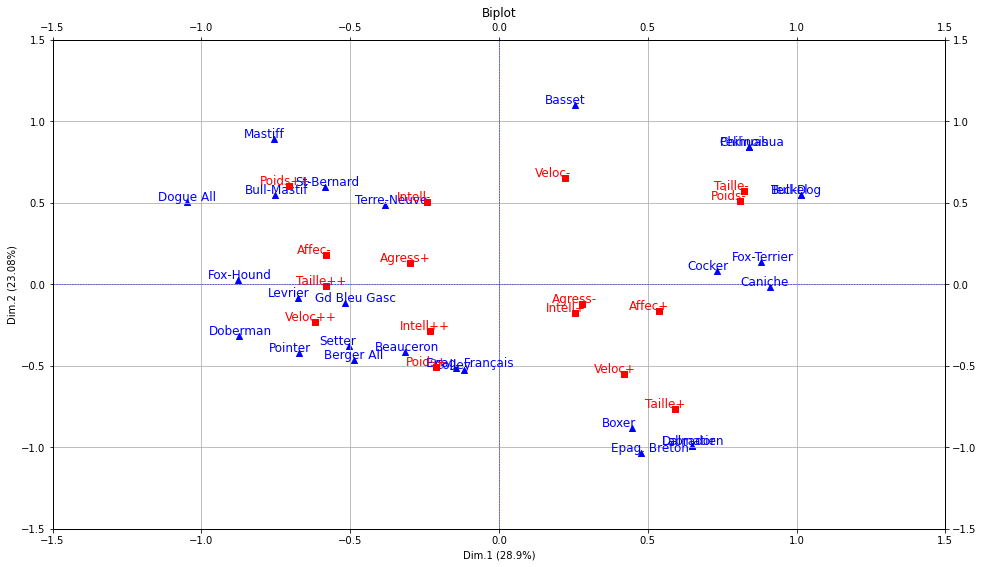

In [46]:
# Affichage
biplot(data1=rowcoord,data2=correctcoordeig,eigen=eigenvalue,
       axei=0,axej=1,figsize=(16,9))

## Interprétation des résultats

### Analyse du point de vue des individus

#### Cosinus carré des individus

In [105]:
# Cosinus carré des individus
rowcos2 = rowcoord.apply(lambda x:x**2/rowdisto.T.values,axis = 0)
display(rowcos2.iloc[:,[0,1]].round(3))

,Dim.1,Dim.2
Chien,,
Beauceron,0.089,0.154
Basset,0.034,0.635
Berger All,0.154,0.140
Boxer,0.111,0.433
Bull-Dog,0.624,0.184
Bull-Mastif,0.271,0.143
Caniche,0.385,0.000
Chihuahua,0.380,0.383
Cocker,0.279,0.003


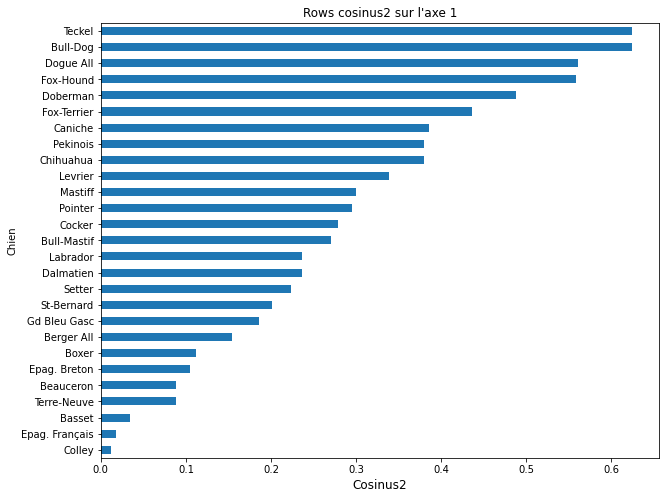

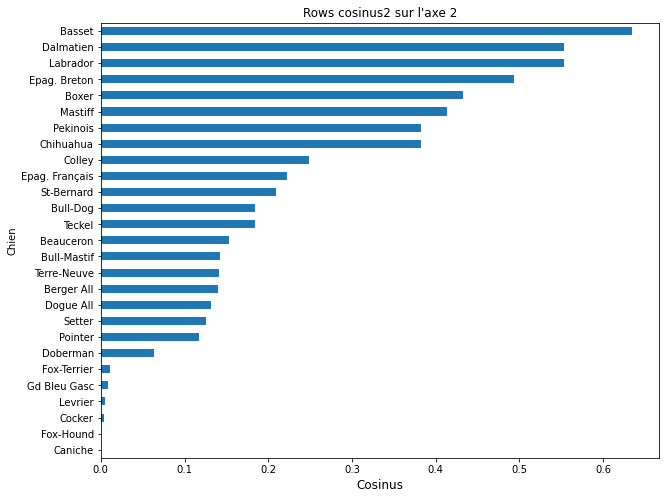

In [48]:
# Affichage graphique des contributions
def plot_graph(data,axis,xlabel,title,figsize=None):
    p = data.shape[1]
    try:
        if axis<0 or axis>p:
            raise ValueError(f'axis doit être compris entre {0} et {p-1}.')
        else:
            sort = data.sort_values(by=f'Dim.{1+axis}', ascending=True)
            sort.iloc[:,axis].plot.barh(figsize=figsize)
            plt.xlabel(xlabel,fontsize=12)
            plt.title(f"{title} sur l'axe {1+axis}",fontsize=12)
            plt.show()
    except ValueError as f:
        print(f)   

# Cosinus carré axe 1
plot_graph(data=rowcos2,axis=0,xlabel = 'Cosinus2',title = 'Rows cosinus2',
           figsize=(10,8))

# Cosinus carré axe 2
plot_graph(data=rowcos2,axis=1,xlabel = 'Cosinus',title = 'Rows cosinus2',
           figsize=(10,8))

__Contributions des individus__

In [104]:
# Contribution des individus
rowcontrib = rowcoord.apply(lambda x : 100*x**2/(I*eigenvalue),axis=1)
display(rowcontrib.iloc[:,[0,1]].round(3))

,Dim.1,Dim.2
Chien,,
Beauceron,0.774,1.680
Basset,0.497,11.674
Berger All,1.819,2.077
Boxer,1.539,7.485
Bull-Dog,7.897,2.911
Bull-Mastif,4.356,2.879
Caniche,6.401,0.003
Chihuahua,5.437,6.855
Cocker,4.135,0.060


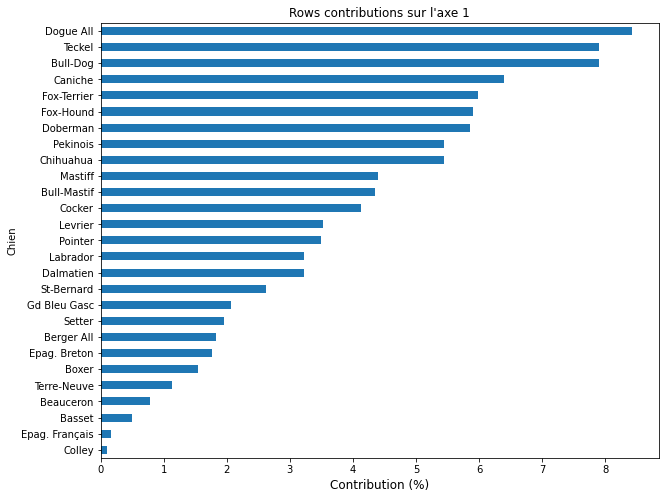

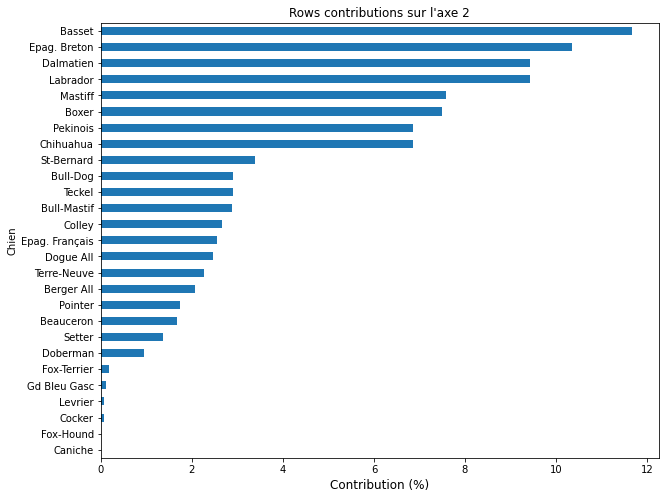

In [50]:
# Contribution axe 1
plot_graph(data=rowcontrib,axis=0,xlabel = 'Contribution (%)',
           title = 'Rows contributions',figsize=(10,8))

# Contribution axe 2
plot_graph(data=rowcontrib,axis=1,xlabel = 'Contribution (%)',
           title = 'Rows contributions',figsize=(10,8))

__Analyse du point de vue des modalités__

__Cosinus carré des modalités__

In [103]:
# Cosinus des modalités
modcos2 = modcoord.apply(lambda x:x**2/moddisto.values, axis = 0)
display(modcos2.iloc[:,[0,1]].round(3))

,Dim.1,Dim.2
Taille+,0.165,0.345
Taille++,0.875,0.001
Taille-,0.491,0.299
Poids+,0.100,0.722
Poids++,0.234,0.216
Poids-,0.575,0.286
Veloc+,0.153,0.332
Veloc++,0.398,0.069
Veloc-,0.060,0.642
Intell+,0.127,0.076


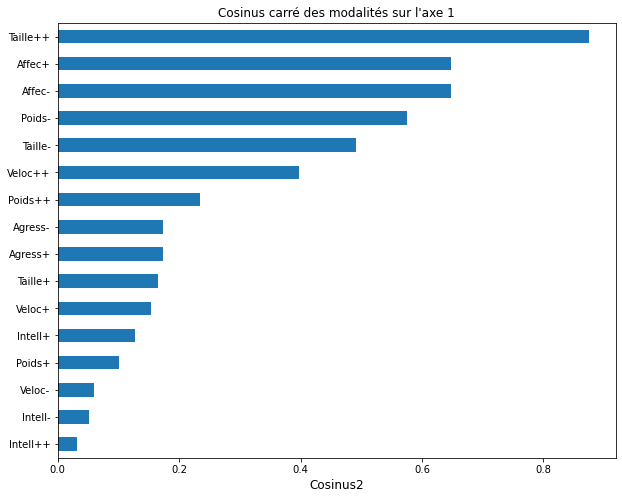

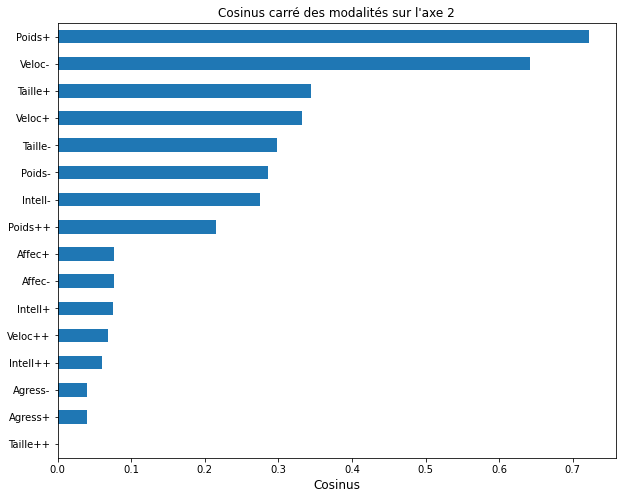

In [52]:
# Cosinus carré axe 1
plot_graph(data=modcos2,axis=0,xlabel = 'Cosinus2',
           title = "Cosinus carré des modalités",figsize=(10,8))

# Cosinus carré axe 2
plot_graph(data=modcos2,axis=1,xlabel = 'Cosinus',
           title = "Cosinus carré des modalités",figsize=(10,8))

__Contribution des modalités__

In [102]:
# Contribution des modalités
contrib = modcoord.apply(lambda x : 100*x**2/eigenvalue,axis=1)
modcontrib = contrib.apply(lambda x : x*modweight, axis=0)
display(modcontrib.iloc[:,[0,1]].round(3))

,Dim.1,Dim.2
Taille+,4.642,12.171
Taille++,13.459,0.010
Taille-,12.598,9.587
Poids+,1.674,15.062
Poids++,6.604,7.609
Poids-,14.010,8.722
Veloc+,3.737,10.117
Veloc++,9.180,1.996
Veloc-,1.312,17.517
Intell+,2.274,1.700


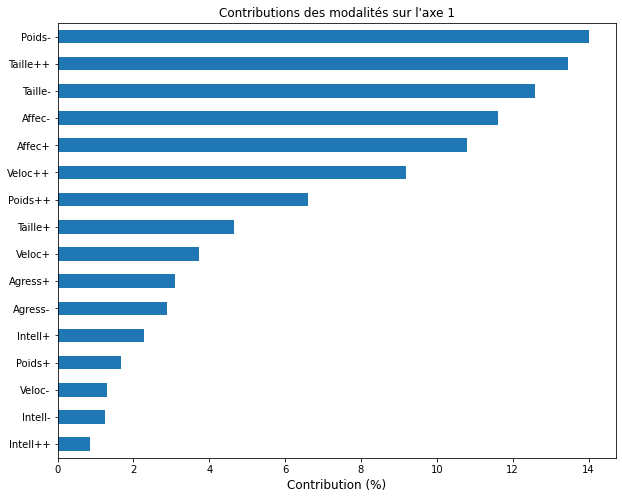

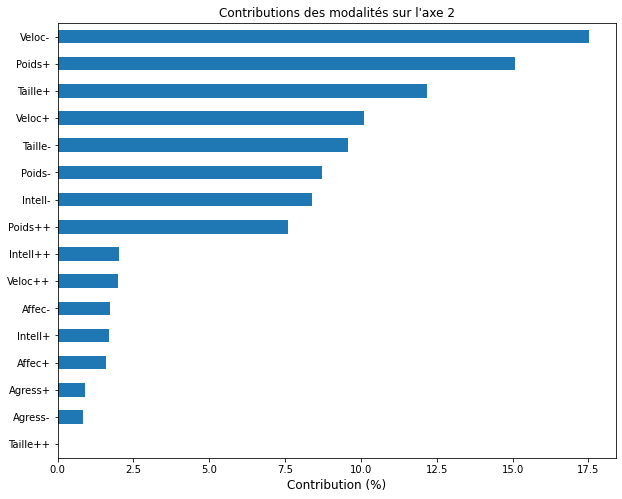

In [54]:
# Contribution axe 1
plot_graph(data=modcontrib,axis=0,xlabel = 'Contribution (%)',
           title = 'Contributions des modalités',figsize=(10,8))

# Contribution axe 2
plot_graph(data=modcontrib,axis=1,xlabel = 'Contribution (%)',
           title = 'Contributions des modalités',figsize=(10,8))

__Valeur test__

In [101]:
# Valeur test
modVtest = modcoord.apply(lambda x : x*np.sqrt(((I-1)*rowMarge)/(I-rowMarge)))
display(modVtest.iloc[:,[0,1]].round(3))

,Dim.1,Dim.2
Taille+,2.069,-2.994
Taille++,-4.770,-0.117
Taille-,3.575,2.787
Poids+,-1.616,-4.333
Poids++,-2.468,2.367
Poids-,3.868,2.727
Veloc+,1.997,-2.937
Veloc++,-3.217,-1.341
Veloc-,1.251,4.086
Intell+,1.815,-1.403


__Analyse du point de vue des variables__

__Cosinus carré des variables__

In [100]:
# Cosinus carré des variables
varcos2 = pd.DataFrame(np.zeros((J,hmax),dtype=float),columns=index,
                       index=donnee.columns)
varcos2.index.name = 'Variable'
for name in donnee.columns:
    varcos2.loc[name,:]= modcos2.loc[np.unique(donnee[name]),:].sum()
display(varcos2.iloc[:,[0,1]].round(3))

,Dim.1,Dim.2
Variable,,
Taille,1.531,0.644
Poids,0.910,1.224
Velocite,0.612,1.043
Intelligence,0.210,0.411
Affection,1.295,0.153
Agressivite,0.346,0.081


__Contribution des variables__

In [99]:
# Contribution des variables
varcontrib = pd.DataFrame(np.zeros((J,hmax),dtype=float),columns=index,
                       index=donnee.columns)
varcontrib.index.name = 'Variable'
for name in donnee.columns:
    varcontrib.loc[name,:]= modcontrib.loc[np.unique(donnee[name]),:].sum()
display(varcontrib.iloc[:,[0,1]].round(3))

,Dim.1,Dim.2
Variable,,
Taille,30.698,21.767
Poids,22.288,31.393
Velocite,14.229,29.631
Intelligence,4.387,12.124
Affection,22.413,3.324
Agressivite,5.984,1.760


__Rapport de corrélation__

In [98]:
# Rapport de corrélation
eta2= varcontrib.apply(lambda x : J*x*eigenvalue/100, axis=1)
display(eta2.iloc[:,[0,1]].round(3))

,Dim.1,Dim.2
Variable,,
Taille,0.887,0.502
Poids,0.644,0.725
Velocite,0.411,0.684
Intelligence,0.127,0.280
Affection,0.648,0.077
Agressivite,0.173,0.041


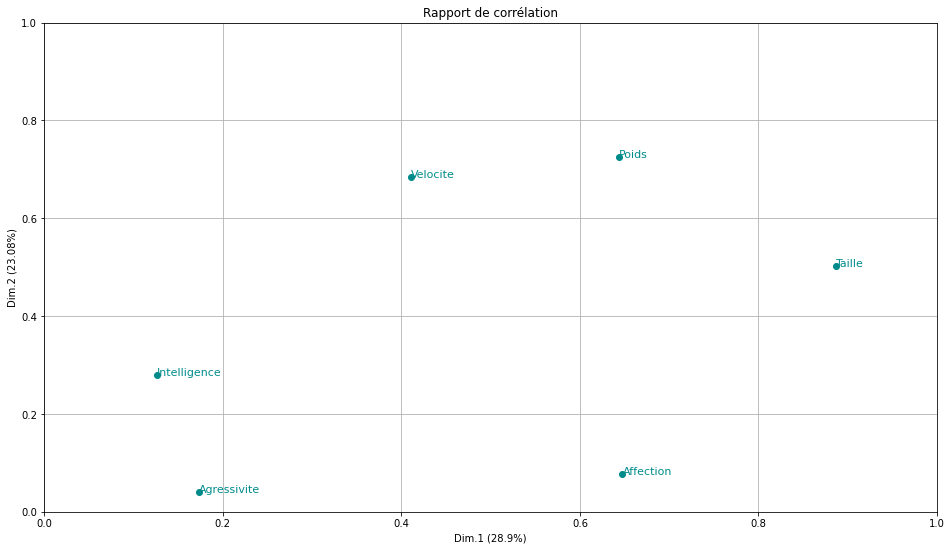

In [59]:
# Fonction de visualisation en 2D
def corr_plot(data,eigen,axei,axej,main,figsize=None):
    try:
        if axei==axej:
            raise ValueError('Erreur: axei doit être différent de axej.')
        elif axei>axej:
            raise ValueError('Erreur: axei doit être inférieur à axej.')
        elif axei<0 or axej<0:
            msg = 'Erreur: les valeurs des axes doivent être positives ou nulles.'
            raise ValueError(msg)
        else:
            # set limite
            n = data.shape[0]
            # Valeurs propres
            percent = np.array([100*x/sum(eigen) for x in eigen])
            dimi = round(percent[axei],2); dimj = round(percent[axej],2)

            # Graphique
            fig, axes = plt.subplots(figsize = figsize); axes.grid()
            axes.axis([0,+1,0,+1])
            axes.set_title(main)
            axes.set_xlabel(f"Dim.{1+axei} ({dimi}%)")
            axes.set_ylabel(f"Dim.{1+axej} ({dimj}%)")
            for i in range(n):
                plt.scatter(data.iloc[i,axei], data.iloc[i,axej],
                            c = "darkcyan", alpha = 1)
                axes.text(data.iloc[i,axei],data.iloc[i,axej],data.index[i],
                          color = "darkcyan", fontsize = 11)
            plt.show()
            
    # if false then raise the value error
    except ValueError as e:
            print(e) 

corr_plot(data=eta2,eigen=eigenvalue,axei=0,axej=1,
          main= 'Rapport de corrélation',figsize=(16,9))

__Propriétés barycentriques et éléments supplémentaires__

__Individus supplémentaires__

In [97]:
# Individus supplémentaires
ind_sup = pd.read_excel('races_canines_acm.xls',sheet_name=1,header=0,index_col=0)
display(ind_sup)

,Taille,Poids,Velocite,Intelligence,Affection,Agressivite
Chien,,,,,,
Medor,Taille+,Poids-,Veloc-,Intell++,Affec-,Agress+
Djeck,Taille++,Poids++,Veloc+,Intell+,Affec+,Agress-
Taico,Taille-,Poids+,Veloc++,Intell++,Affec+,Agress+
Rocky,Taille+,Poids+,Veloc+,Intell-,Affec+,Agress-
Boudog,Taille-,Poids-,Veloc++,Intell+,Affec-,Agress+
Wisky,Taille+,Poids++,Veloc-,Intell-,Affec+,Agress+


In [61]:
# Dimension
n = ind_sup.shape[0]
print(f'Nous avons {n} chiens supplémentaires.')

Nous avons 6 chiens supplémentaires.


In [96]:
# Codage en 0/1
dummiesSup = pd.get_dummies(ind_sup, prefix = "",prefix_sep = "")
display(dummiesSup)

,Taille+,Taille++,Taille-,Poids+,Poids++,Poids-,Veloc+,Veloc++,Veloc-,Intell+,Intell++,Intell-,Affec+,Affec-,Agress+,Agress-
Chien,,,,,,,,,,,,,,,,
Medor,1,0,0,0,0,1,0,0,1,0,1,0,0,1,1,0
Djeck,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1
Taico,0,0,1,1,0,0,0,1,0,0,1,0,1,0,1,0
Rocky,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1
Boudog,0,0,1,0,0,1,0,1,0,1,0,0,0,1,1,0
Wisky,1,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0


In [95]:
# Profil des individus supplémentaires
rowsupprofil = dummiesSup.apply(lambda x: x/np.sum(x),axis=1)
display(rowsupprofil.round(2))

,Taille+,Taille++,Taille-,Poids+,Poids++,Poids-,Veloc+,Veloc++,Veloc-,Intell+,Intell++,Intell-,Affec+,Affec-,Agress+,Agress-
Chien,,,,,,,,,,,,,,,,
Medor,0.17,0.00,0.00,0.00,0.00,0.17,0.00,0.00,0.17,0.00,0.17,0.00,0.00,0.17,0.17,0.00
Djeck,0.00,0.17,0.00,0.00,0.17,0.00,0.17,0.00,0.00,0.17,0.00,0.00,0.17,0.00,0.00,0.17
Taico,0.00,0.00,0.17,0.17,0.00,0.00,0.00,0.17,0.00,0.00,0.17,0.00,0.17,0.00,0.17,0.00
Rocky,0.17,0.00,0.00,0.17,0.00,0.00,0.17,0.00,0.00,0.00,0.00,0.17,0.17,0.00,0.00,0.17
Boudog,0.00,0.00,0.17,0.00,0.00,0.17,0.00,0.17,0.00,0.17,0.00,0.00,0.00,0.17,0.17,0.00
Wisky,0.17,0.00,0.00,0.00,0.17,0.00,0.00,0.00,0.17,0.00,0.00,0.17,0.17,0.00,0.17,0.00


In [94]:
# Coordonnées factorielles des individus supplémentaires
rowsupcoord = rowsupprofil.dot(modcoord)/np.sqrt(eigenvalue)
display(rowsupcoord.iloc[:,[0,1]].round(3))

,Dim.1,Dim.2
Chien,,
Medor,0.177,0.181
Djeck,0.071,-0.183
Taico,-0.001,-0.211
Rocky,0.475,-0.696
Boudog,0.136,0.427
Wisky,0.036,0.413


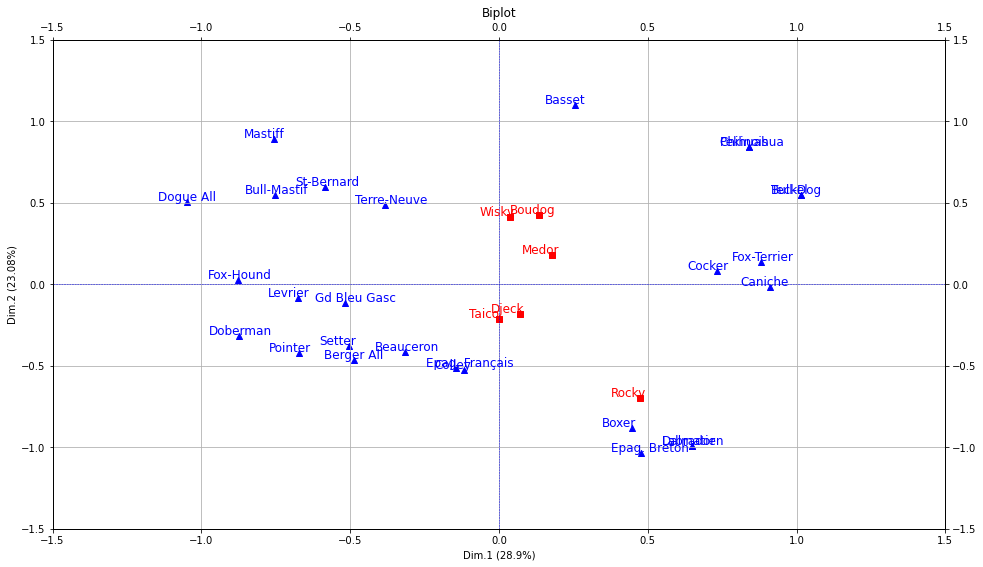

In [65]:
# Positionnement des individus supplémentaires
biplot(data1=rowcoord,data2=rowsupcoord,eigen=eigenvalue,
       axei=0,axej=1,figsize=(16,9))

__Variables supplémentaires__

__Variables qualitatives supplémentatives__

In [66]:
# Variables qualitatives supplémentaires
vsqual = pd.read_excel('races_canines_acm.xls',sheet_name=2,header=0,index_col=0)

__Approche par moyenne conditionnelle__

In [93]:
# Structures temporaires réunissant les coordonnées et la variable Fonction
df = pd.concat([rowcoord, vsqual], axis = 1)
# Cacul des moyennes conditionnelles
condmeanfonction = pd.pivot_table(df, values = ['Dim.1','Dim.2','Dim.3'],
                                  index = "Fonction",aggfunc = "mean")
display(condmeanfonction.iloc[:,[0,1]].round(3))

,Dim.1,Dim.2
Fonction,,
chasse,-0.224,-0.268
compagnie,0.721,0.059
utilite,-0.650,0.228


__Remarque__

In [92]:
# Coordonnées factorielles des modalités supplémentaires 
modsupcoord = condmeanfonction.apply(lambda x : x/np.sqrt(eigenvalue[:3]),
                                     axis = 1)
display(modsupcoord.iloc[:,[0,1]].round(3))

,Dim.1,Dim.2
Fonction,,
chasse,-0.322,-0.432
compagnie,1.039,0.095
utilite,-0.936,0.367


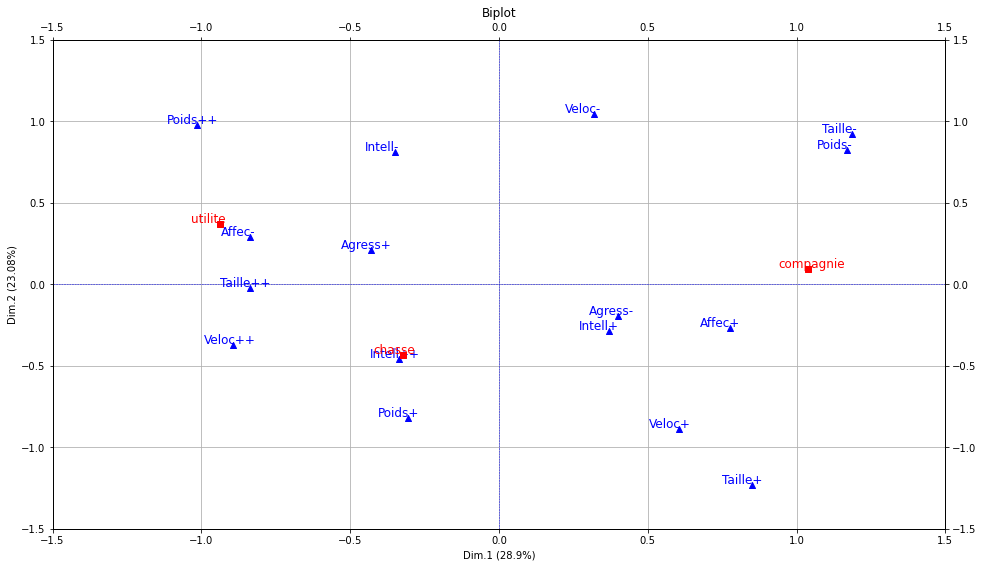

In [69]:
# Positionnement des modalités supplémentaires
biplot(data1=modcoord,data2=modsupcoord,eigen=eigenvalue,
       axei=0,axej=1,figsize=(16,9))

__Approche par relation de transition__

In [91]:
# Codage en 0/1
dummiesfunc = pd.get_dummies(vsqual, prefix = "",prefix_sep = "")
# Calcul des profils
modsupprofil = dummiesfunc.apply(lambda x : x/np.sum(x), axis = 0)
#Coordonnées des modalités supplémentaires
modsupcoord = modsupprofil.T.dot(rowcoord)/np.sqrt(eigenvalue)
display(modsupcoord.iloc[:,[0,1]].round(3))

,Dim.1,Dim.2
chasse,-0.322,-0.432
compagnie,1.039,0.095
utilite,-0.936,0.367


In [90]:
# Marge ligne
marge = dummiesfunc.sum(axis=0)
# pk des modalités
pk = marge/I
# Distance à l'origine
modsupdisto = (1/pk) - 1
display(modsupdisto.round(3))

chasse       2.000
compagnie    1.700
utilite      2.375
dtype: float64

In [89]:
# Valeur test des modalités supplémentaires
modsupVtest = modsupcoord.apply(lambda x:x*np.sqrt(((I-1)*marge)/(I-marge)))
display(modsupVtest.iloc[:,[0,1]].round(3))

,Dim.1,Dim.2
chasse,-1.162,-1.559
compagnie,4.065,0.373
utilite,-3.099,1.215


In [88]:
display(pd.concat([marge,modsupdisto,modsupcoord.iloc[:,[0,1,2]],
           modsupVtest.iloc[:,[0,1,2]]],axis=1).round(3))

,0,1,Dim.1,Dim.2,Dim.3,Dim.1,Dim.2,Dim.3
chasse,9,2.000,-0.322,-0.432,-0.349,-1.162,-1.559,-1.257
compagnie,10,1.700,1.039,0.095,-0.068,4.065,0.373,-0.266
utilite,8,2.375,-0.936,0.367,0.477,-3.099,1.215,1.579


__Variable quantitative supplémentaire__

In [74]:
# Variables quantitatives supplémentaires
vsquant = pd.read_excel('races_canines_acm.xls',sheet_name=3,header=0,index_col=0)

In [87]:
# Corrélation avec les deux premiers axes
cotecorr = np.corrcoef(vsquant.values,rowcoord.iloc[:,[0,1]],
                       rowvar = False)[0, 1:]
corr = pd.DataFrame(cotecorr.reshape(1,2),columns=['Dim.1','Dim.2'],
                    index=['Cote'])
display(corr)

,Dim.1,Dim.2
Cote,-0.042141,0.601291


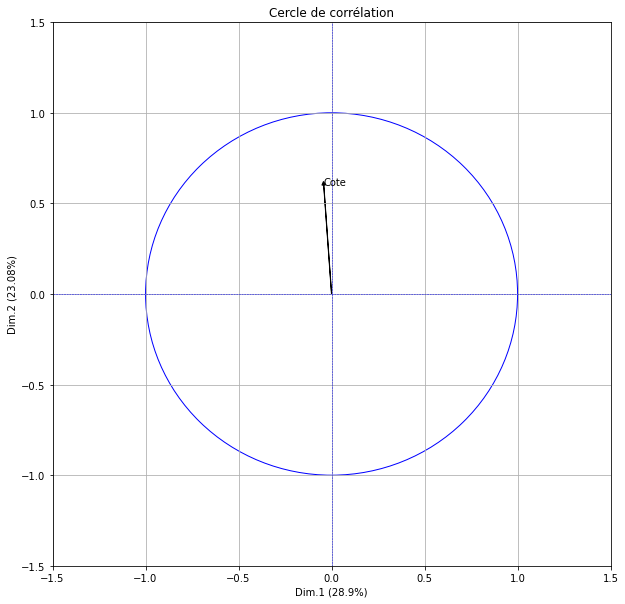

In [76]:
# Visualisation du nuage des variables (=Cercle de corrélation)
def corrplot(data,eigen,axei,axej,figsize=None):
    try:
        if axei==axej:
            raise ValueError('Erreur: axei doit être différent de axej.')
        elif axei>axej:
            raise ValueError('Erreur: axei doit être inférieur à axej.')
        elif axei<0 or axej<0:
            msg = 'Erreur: les valeurs des axes doivent être positives ou nulles.'
            raise ValueError(msg)
        else:
            p = data.shape[0]
            # Valeurs propres
            percent = np.array([100*x/sum(eigen) for x in eigen])
            dimi = round(percent[axei],2); dimj = round(percent[axej],2)
            
            # Graphique
            fig, axes = plt.subplots(figsize = figsize)
            axes.grid()
            axes.axis([-1.5,1.5,-1.5,1.5])
            axes.set_title("Cercle de corrélation")
            axes.set_xlabel(f"Dim.{1+axei} ({dimi}%)")
            axes.set_ylabel(f"Dim.{1+axej} ({dimj}%)")
            for j in range(p):
                axes.arrow(0,0,data.iloc[j,axei],data.iloc[j,axej],
                           head_width = 0.02,head_length = 0.02,color='black')
                axes.text(data.iloc[j,axei],data.iloc[j,axej],data.index[j],
                          color = "black")
            # cercle
            from matplotlib.patches import Ellipse
            ellipse = Ellipse((0,0),width = 2, height = 2,facecolor = "none", 
                              edgecolor = "blue")
            axes.add_patch(ellipse)
            plt.axhline(0, color='blue',linestyle="--", linewidth=0.5)
            plt.axvline(0, color='blue',linestyle="--", linewidth=0.5)
            plt.show()
    # if false then raise the value error
    except ValueError as e:
            print(e)  

# Nuage des variables
corrplot(data=corr,eigen=eigenvalue,axei=0,axej=1,figsize=(10,10))

__Approche par Machine Learning__

In [77]:
# dataset
features = rowcoord.values
target = np.ravel(vsqual.values)
featuresSup = rowsupcoord.values

In [86]:
# Classe pour la régression logistique
from sklearn.linear_model import LogisticRegression

# instanciation
model1 = LogisticRegression()
# Prédiction pour les individus supplémentaires
model1.fit(features,target)
targetSup = model1.predict(featuresSup)
prediction = pd.DataFrame(targetSup, index = ind_sup.index, 
                       columns = ["Fonction Pred."])
display(prediction)

,Fonction Pred.
Chien,
Medor,chasse
Djeck,compagnie
Taico,utilite
Rocky,chasse
Boudog,compagnie
Wisky,utilite


In [85]:
display(pd.concat([rowinfos,rowcoord[['Dim.1','Dim.2','Dim.3']],rowcontrib[['Dim.1','Dim.2','Dim.3']],
           rowcos2[['Dim.1','Dim.2','Dim.3']]],axis=1).round(3))

,Disto2,Poids,Inertie,Dim.1,Dim.2,Dim.3,Dim.1,Dim.2,Dim.3,Dim.1,Dim.2,Dim.3
Chien,,,,,,,,,,,,
Beauceron,1.135,0.037,0.042,-0.317,-0.418,-0.101,0.774,1.680,0.181,0.089,0.154,0.009
Basset,1.910,0.037,0.071,0.254,1.101,-0.191,0.497,11.674,0.638,0.034,0.635,0.019
Berger All,1.539,0.037,0.057,-0.486,-0.464,-0.498,1.819,2.077,4.357,0.154,0.140,0.161
Boxer,1.798,0.037,0.067,0.447,-0.882,0.692,1.539,7.485,8.408,0.111,0.433,0.266
Bull-Dog,1.644,0.037,0.061,1.013,0.550,-0.163,7.897,2.911,0.469,0.624,0.184,0.016
Bull-Mastif,2.092,0.037,0.077,-0.753,0.547,0.498,4.356,2.879,4.347,0.271,0.143,0.118
Caniche,2.161,0.037,0.080,0.912,-0.016,-0.577,6.401,0.003,5.836,0.385,0.000,0.154
Chihuahua,1.861,0.037,0.069,0.841,0.844,-0.470,5.437,6.855,3.877,0.380,0.383,0.119
Cocker,1.926,0.037,0.071,0.733,0.079,0.662,4.135,0.060,7.700,0.279,0.003,0.228


In [83]:
display(pd.concat([rowMarge,modinfos,modcoord[['Dim.1','Dim.2','Dim.3']],modcontrib[['Dim.1','Dim.2','Dim.3']],
           modcos2[['Dim.1','Dim.2','Dim.3']],modVtest.iloc[:,[0,1,2]].round(3)],axis=1).round(3))

,0,Disto2,Poids,Inertie,Dim.1,Dim.2,Dim.3,Dim.1,Dim.2,Dim.3,Dim.1,Dim.2,Dim.3,Dim.1,Dim.2,Dim.3
Taille+,5,4.400,0.031,0.136,0.851,-1.232,1.016,4.642,12.171,15.104,0.165,0.345,0.235,2.069,-2.994,2.470
Taille++,15,0.800,0.093,0.074,-0.837,-0.021,-0.051,13.459,0.010,0.115,0.875,0.001,0.003,-4.770,-0.117,-0.292
Taille-,7,2.857,0.043,0.123,1.185,0.924,-0.616,12.598,9.587,7.772,0.491,0.299,0.133,3.575,2.787,-1.858
Poids+,14,0.929,0.086,0.080,-0.305,-0.819,-0.231,1.674,15.062,2.191,0.100,0.722,0.058,-1.616,-4.333,-1.224
Poids++,5,4.400,0.031,0.136,-1.015,0.974,1.222,6.604,7.609,21.833,0.234,0.216,0.339,-2.468,2.367,2.970
Poids-,8,2.375,0.049,0.117,1.169,0.824,-0.359,14.010,8.722,3.013,0.575,0.286,0.054,3.868,2.727,-1.187
Veloc+,8,2.375,0.049,0.117,0.604,-0.888,0.356,3.737,10.117,2.972,0.153,0.332,0.053,1.997,-2.937,1.179
Veloc++,9,2.000,0.056,0.111,-0.892,-0.372,-0.763,9.180,1.996,15.335,0.398,0.069,0.291,-3.217,-1.341,-2.751
Veloc-,10,1.700,0.062,0.105,0.320,1.045,0.402,1.312,17.517,4.722,0.060,0.642,0.095,1.251,4.086,1.571
Intell+,13,1.077,0.080,0.086,0.369,-0.286,0.493,2.274,1.700,9.253,0.127,0.076,0.226,1.815,-1.403,2.423


In [84]:
display(pd.concat([varinertie.T.round(3),varcos2.iloc[:,[0,1,2]].round(3),varcontrib.iloc[:,[0,1,2]].round(3),
          eta2.iloc[:,[0,1,2]].round(3)],axis=1))

,inertie,Dim.1,Dim.2,Dim.3,Dim.1,Dim.2,Dim.3,Dim.1,Dim.2,Dim.3
Variable,,,,,,,,,,
Taille,0.333,1.531,0.644,0.371,30.698,21.767,22.992,0.887,0.502,0.291
Poids,0.333,0.910,1.224,0.451,22.288,31.393,27.038,0.644,0.725,0.342
Velocite,0.333,0.612,1.043,0.440,14.229,29.631,23.030,0.411,0.684,0.291
Intelligence,0.333,0.210,0.411,0.381,4.387,12.124,18.465,0.127,0.280,0.234
Affection,0.167,1.295,0.153,0.008,22.413,3.324,0.314,0.648,0.077,0.004
Agressivite,0.167,0.346,0.081,0.207,5.984,1.760,8.162,0.173,0.041,0.103


In [82]:
# Exporter les coordonnées factorielles
#rowcoord.to_pickle("races_canines.pkl")  